# Nested_Model_test
A test to see if numpyro can test models in one another.  
Conclusion: yes

In [37]:
import jax
import jax.numpy as jnp
import numpyro
import numpy as np
from chainconsumer import ChainConsumer
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
numpyro.set_host_device_count(1)
jax.config.update('jax_platform_name', 'cpu')

Create an outer model and an inner model:

In [ ]:
def outer_model():
    x = numpyro.sample('x', numpyro.distributions.Normal(0,1))
    inner_model()
    
def inner_model():
    y = numpyro.sample('y', numpyro.distributions.Normal(1,2))

Make a simple sampler and fire it off in the normal way:

In [57]:
print("Beginning sampling...")
sampler = numpyro.infer.MCMC(
    infer.NUTS(model = outer_model, init_strategy=infer.init_to_uniform()),
    num_warmup=100,
    num_samples=20000,
    num_chains=1,
    progress_bar=False,
    chain_method = 'sequential',
)
sampler.run(jax.random.PRNGKey(10))
print("Done")


Beginning sampling...
Done


Retrieve in chainconsumer and plot as per normal:

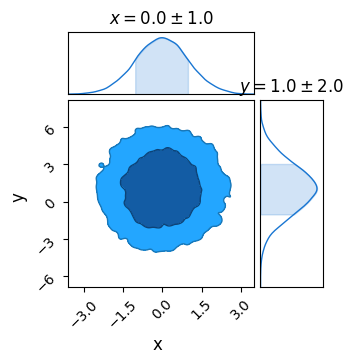

In [58]:
output = sampler.get_samples()
c = ChainConsumer()
c.add_chain([output['x'],output['y']], parameters=['x','y'])
c.plotter.plot()
plt.show()